https://networkx.org/documentation/latest/tutorial.html

# 노드, 엣지 생성 및 삭제

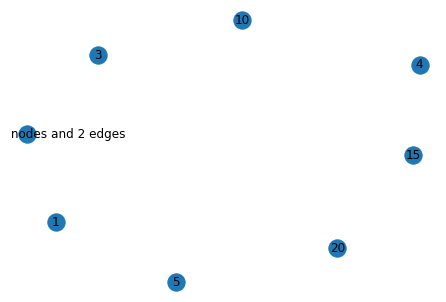

In [1]:
import networkx as nx
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2, 3])

#You can also add nodes along with node attributes if your container yields 2-tuples of the form (node,node_attribute_dict):
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

# Nodes from one graph can be incorporated into another:
H = nx.path_graph([10,15,20])
G.add_nodes_from(H)


# 노드 1개에 3개의 노드 때려박기
H1 = nx.path_graph([10,15,20])
G.add_node(H1) 


G.remove_node(2) # 노드제거

nx.draw(G, with_labels = True)

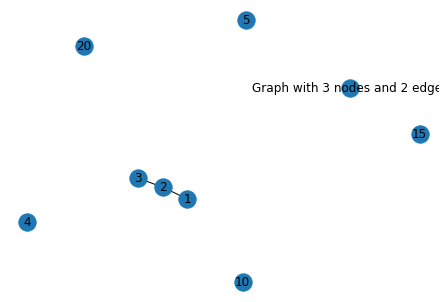

In [4]:
G.add_edge(1, 2)

# 튜플 생성 후 연결도 가능 
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# 튜플 로 한변에 여러개 엣지 생성 (효율적)
G.add_edges_from([(1, 2), (1, 3)])

# 엣지 제거
G.remove_edge(1, 3)

nx.draw(G, with_labels = True)

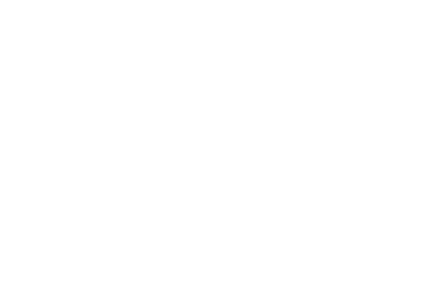

In [5]:
G.clear() # 그래프 제거
nx.draw(G, with_labels = True)

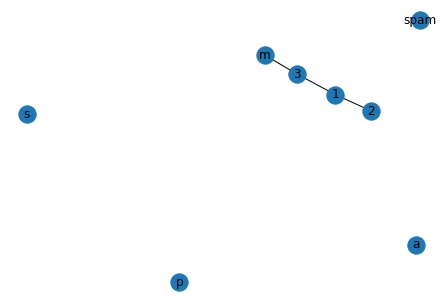

In [10]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G, with_labels = True)
# G.clear()            # 그래프 제거

In [ ]:
dgr = nx.deg

## 리스트와 딕셔너리 활용, 그래프 생성 가능

[(0, 1), (1, 2), (2, 3)]


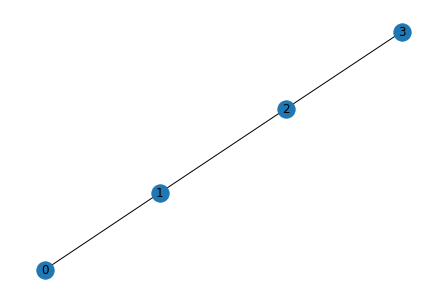

In [7]:
edgelist = [[0, 1], [1, 2], [2, 3]]
H = nx.Graph(edgelist)  
print(list(H.edges()))
nx.draw(H, with_labels = True)
# G.clear()            # 그래프 제거

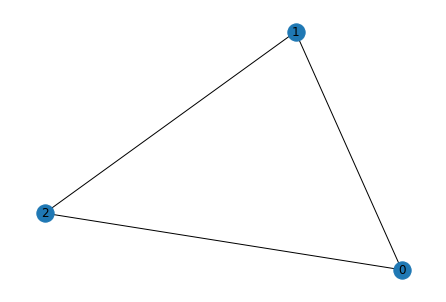

In [8]:
adjacency_dict = {0: [1, 2], 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())
nx.draw(H, with_labels = True)

In [9]:
# nx.draw(G, with_labels = True)
G.clear()
# H.clear()

## 두 노드 사이의 상관계수 활용하여 그래프 생성

엣지와 weight를 이중리스트 형태로 입력하여 그래프 생성 가능 

In [8]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [9]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
# for n, nbrs in FG.adj.items():
#     # print(n, nbrs)
#     for nbr, eattr in nbrs.items():
#         print(nbr, eattr)

In [10]:
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

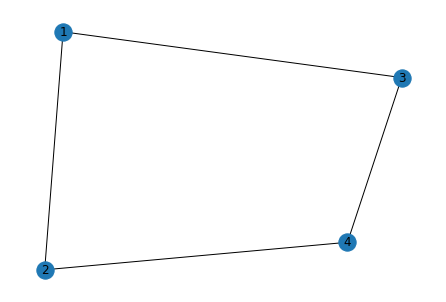

In [11]:
nx.draw(FG, with_labels = True) 
# 1-3,2-4 가깝고, 1-2 멀게 등...확인, but 매번 그래프 모양은 바뀜

In [12]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


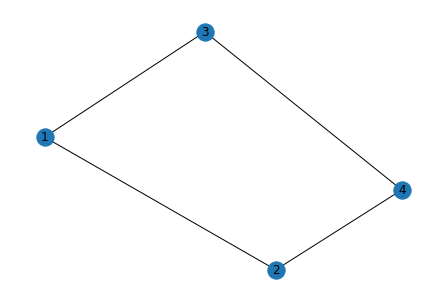

In [17]:
nx.draw(FG, with_labels = True) 

# 그래프 요소 점검하기

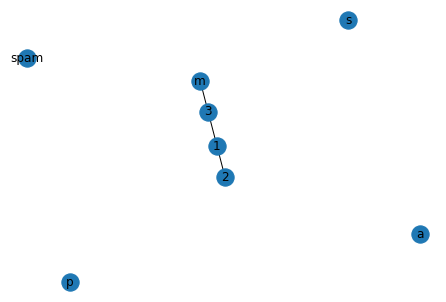

In [26]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G, with_labels = True)

In [27]:
G.number_of_nodes(),G.number_of_edges()

(8, 3)

In [21]:
# 노드 및 엣지 리스트 확인
list(G.nodes),list(G.edges)

([], [])

In [24]:
# 인접한 노드 확인
list(G.adj[1])

[2, 3]

In [ ]:
# 발생한 엣지의 수 확인
G.degree[1] ,G.degree([2, 'm'])

In [ ]:
# 관련된 모든 엣지를 보여줌
G.edges([2, 3])

## 노드 속성 Node attributes

노드는 딕셔너리 형태로 속성값을 내포할 수 있다

In [ ]:
G = nx.Graph(day="Friday")
G.graph

In [ ]:
G.graph['day'] = "Monday"
G.graph

In [ ]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

In [ ]:
G.nodes[1]['room'] = 714
G.nodes.data()

In [ ]:
nx.draw(G, with_labels = True) 
# 정보를 내포하고 있는 1, 3 노드가 보인다

## 엣지 속성 Edge Attributes

엣지는 가중치를 속성으로 갖는다

In [ ]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [ ]:
nx.draw(G, with_labels = True) 

In [ ]:
# nx.draw(G, with_labels = True)
G.clear()
# H.clear()

# 그래프 응용

## 화살표

양방향

[(1, 2), (2, 1)]


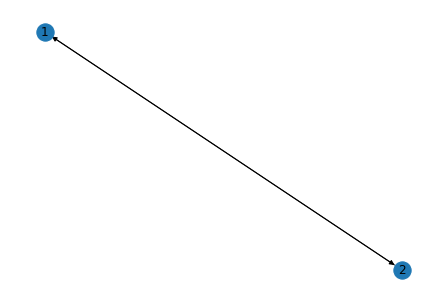

In [98]:
# 상호 화살표
G.add_edge(1, 2)
H = nx.DiGraph(G) 
print(list(H.edges()))
nx.draw(H, with_labels = True)
# G.clear()            # 그래프 제거

일방향

## 멀티그래프

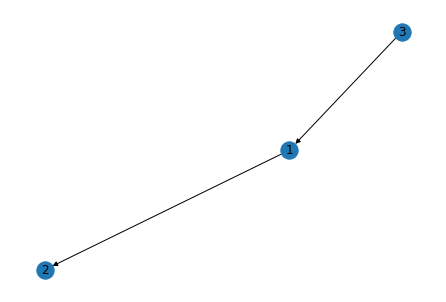

In [28]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
nx.draw(DG, with_labels = True)

In [29]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(dict(MG.degree(weight='weight')))

{1: 1.25, 2: 1.75, 3: 0.5}


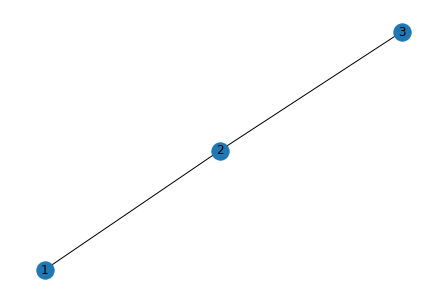

In [159]:
# 가중치 최소값으로 통일
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.draw(GG, with_labels = True)

# Graph generators

## 기본 

> subgraph(G, nbunch) : nbunch의 노드에서 유도된 하위 그래프를 반환

> union(G, H[, rename, name]) : 그래프 G와 H의 합집합을 반환

> disjoint_union(G, H) : G와 H의 차집합을 반환

> cartesian_product(G, H) : G와 H의 데카르트 곱을 반환

> compose(G, H) : H로 구성된 G의 새 그래프를 반환

> complement(G) : G의 그래프 컴필먼트 반환

> create_empty_copy(G[, with_data]) : 엣지 제거된 그래프 G의 복사본 반환

> to_undirected(graph) : 방향 제거 후 그래프 반환

> to_directed(graph): 방향 있는 그래프 반환

## 하나의 Call 사용 (small graph)

> petersen_graph([create_using]): Returns the Petersen graph.

> tutte_graph([create_using]): Returns the Tutte graph.

> sedgewick_maze_graph([create_using]): Return a small maze with a cycle.

> tetrahedral_graph([create_using]): Returns the 3-regular Platonic Tetrahedral graph.

## constructive generators

> complete_graph(n[, create_using]) : Return the complete graph K_n with n nodes.

> complete_bipartite_graph(n1, n2[, create_using]) : Returns the complete bipartite graph K_{n_1,n_2}.

> barbell_graph(m1, m2[, create_using]): Returns the Barbell Graph: two complete graphs connected by a path.

> lollipop_graph(m, n[, create_using]):Returns the Lollipop Graph; K_m connected to P_n.

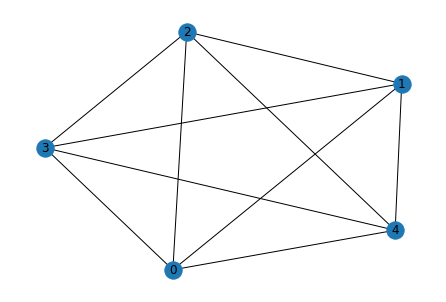

In [32]:
K_5 = nx.complete_graph(5)
nx.draw(K_5, with_labels = True)

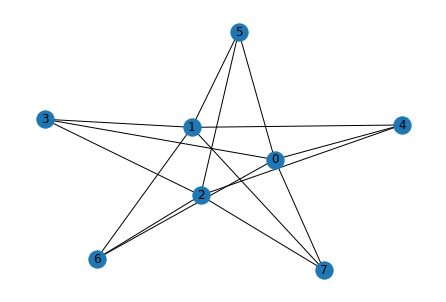

In [33]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw(K_3_5, with_labels = True)

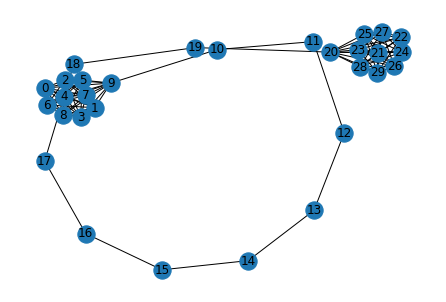

In [34]:
barbell = nx.barbell_graph(10, 10)
nx.draw(barbell, with_labels = True)

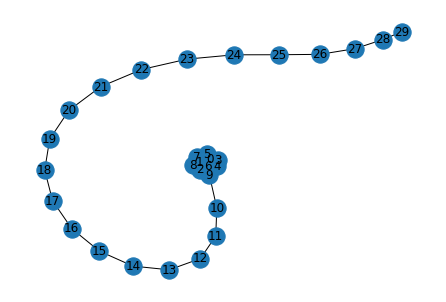

In [35]:
lollipop = nx.lollipop_graph(10, 20)
nx.draw(lollipop, with_labels = True)

## Using a stochastic graph generator, e.g,

> erdos_renyi_graph(n, p[, seed, directed]) : Returns a  random graph, also known as an Erdős-Rényi graph or a binomial graph.

> watts_strogatz_graph(n, k, p[, seed]) : Returns a Watts–Strogatz small-world graph.

> barabasi_albert_graph(n, m[, seed, ...]) : Returns a random graph using Barabási–Albert preferential attachment

> random_lobster(n, p1, p2[, seed]): Returns a random lobster graph.

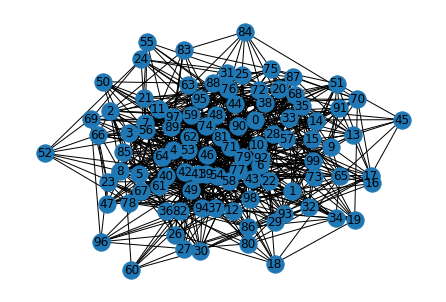

In [36]:
er = nx.erdos_renyi_graph(100, 0.15)
nx.draw(er, with_labels = True)

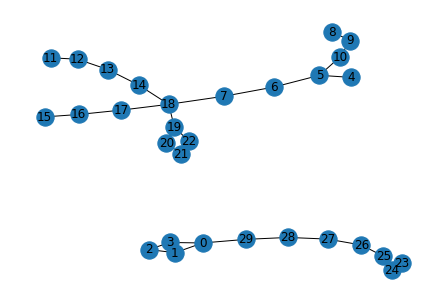

In [37]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw(ws, with_labels = True)

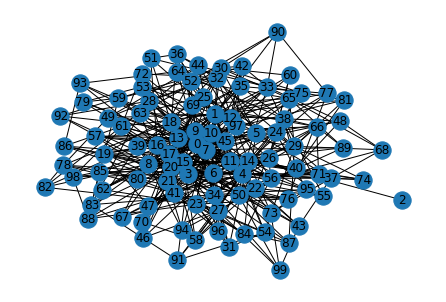

In [38]:
ba = nx.barabasi_albert_graph(100, 5)
nx.draw(ba, with_labels = True)

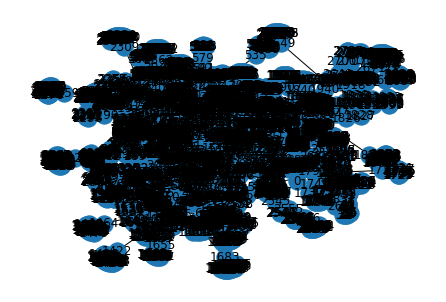

In [40]:
red = nx.random_lobster(20, 0.9, 0.9)
nx.draw(red, with_labels = True)

네트워크를 구성하는 중심성 을 결정하는 몇가치 척도들이 있는데 NetworkX에서 이것들을 모두 지원하기 때문에 짚고 넘어간다

네트워크 그래프적으로 생각한다면 연관어 관련어 한쌍이 함께 등장하는 횟수는 그래프에서 간선(Edge)에 해당하며 단어 하나는 node에 해당하고 단어가 등장하는 횟수는 node의 사이즈로 볼수 있다

* 연결중심성(Degree Centrallity)
연결된 노드가 많을 수록 중심성의 크기가 커진다는 관점을 가진다.
여기서는 관련어, 연관어의 개수를 통해 해당단어가 얼마나 중요한지를 노드의 크기를 통해 나타낼 수 있다.

* 매개중심성 (Betweenness Centrality)
노드와 노드 사이의 최단 경로를 계산할 때 해당 노드를 얼마나 거쳐가는가를 척도로 한다.

* 근접중심성 (Closeness Centrality)
다른 노드들까지의 최단 경로가 가까울수록 해당 노드가 중요하다는 척도를 가진다.
여기서는 연관어들 사이에 얼마나 연관성이 깊은지를 판단할 수 있다.

* 고유벡타 중심성 (Eigenvector Centrality)
연결중심성과 약간 비슷하다. 
차이가 있다면 연결된 다른 노드의 중심성도 고려한다는 것이다. 
중심성의 크기가 큰 노드들과 많이 연결될수록 중요하다고 판단된다.

* 페이지 랭크 (Page Rank)
다른 노드의 중심성과 연결되어있는 다른 노드의 갯수에 따라 해당 노드의 중심성 크기를 상대적으로 결정하는 알고리즘이다. 여기서 상대적으로 결정한다는 것은 한노드의 중심성이 A라고 한다면 연결되어있는 다른 노드의 중심성의 크기를 결정할 때 일정한 임의의 수로 나눠 A/x의중심성을 가지게 된다. (물론 연결되어있는 다른 노드들도 많기 때문에 이 상대적인 값은 계속해서 조정된다.) 지금까지 등장한 중심성 알고리즘 중 가장 최적화된 알고리즘이다.